In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
import time


/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = df= pd.read_csv('encoded.csv')
X ,y = df.drop('isFraud', axis=1),df.isFraud
y = (y==1).astype(int)

In [3]:
from sklearn.model_selection import train_test_split
_, X_keep, _, y_keep = train_test_split(X, y, test_size=0.2)

In [4]:
def ordinary(X_train, X_test, y_train, y_test, model):
    DTC = model.fit(X_train, y_train)
    predictions = DTC.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support =metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    
    
    fpr, tpr, thresholds =roc_curve(y_test, predictions, pos_label=1)
    
    
    auc = metrics.auc(fpr, tpr)
    
    #y_pred_test_prob = grid.predict_proba(X_test)
    
   
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [5]:

def class_weight(X_train, X_test, y_train, y_test, model):
    if 'class_weight' in model.get_params().keys():
            model.set_params(class_weight='balanced')
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            accuracy = metrics.accuracy_score(y_test, predictions)
            precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
            tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
            fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
            auc = metrics.auc(fpr, tpr)



            print("F1: ", metrics.f1_score(y_test, predictions))
            print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
            print("Brier: ", metrics.brier_score_loss(y_test, predictions))
            #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
            print(metrics.classification_report(y_test, predictions))
            conf_matrix = metrics.confusion_matrix(y_test, predictions)

            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(figsize=(8, 8))
            ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
            for i in range(conf_matrix.shape[0]):
                for j in range(conf_matrix.shape[1]):
                    ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
                    plt.title('Confusion Matrix ', size=20)
            plt.xlabel('Predicted label', size=20)
            plt.ylabel('True label', size=20)
            ax.tick_params('x', labelsize = 20)
            ax.tick_params('y', labelsize = 20)
            plt.tight_layout()
            plt.show()



            fig1, ax1 = plt.subplots(figsize=(8, 8))
            #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
            roc_auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
            plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

            plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
            plt.xlim([-0.02, 1.02])
            plt.ylim([-0.02, 1.02])
            plt.xlabel('False Positive Rate', size=20)
            plt.ylabel('True Positive Rate', size=20)
            plt.title('Receiver Operating Characteristic', size=20)
            plt.xticks(size = 20)
            plt.yticks(size = 20)
            plt.legend(loc="lower right", fontsize=18)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)



        print("F1: ", metrics.f1_score(y_test, predictions))
        print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
        print("Brier: ", metrics.brier_score_loss(y_test, predictions))
        #prnt("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
        print(metrics.classification_report(y_test, predictions))
        conf_matrix = metrics.confusion_matrix(y_test, predictions)

        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
                plt.title('Confusion Matrix ', size=20)
        plt.xlabel('Predicted label', size=20)
        plt.ylabel('True label', size=20)
        ax.tick_params('x', labelsize = 20)
        ax.tick_params('y', labelsize = 20)
        plt.tight_layout()
        plt.show()



        fig1, ax1 = plt.subplots(figsize=(8, 8))
        #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

        plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
        plt.xlim([-0.02, 1.02])
        plt.ylim([-0.02, 1.02])
        plt.xlabel('False Positive Rate', size=20)
        plt.ylabel('True Positive Rate', size=20)
        plt.title('Receiver Operating Characteristic', size=20)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.legend(loc="lower right", fontsize=18)
    

In [6]:
def Oversampling(X_train, X_test, y_train, y_test, model, sampler):
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')
        
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
        
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [7]:
def Undersampling(X_train, X_test, y_train, y_test, model,sampler):
    if sampler == 'NearMiss': sampler+=str(sampler.version)
    print(f'Technique: {sampler}')
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')

    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    
    print(fpr, tpr)
    
    auc = metrics.auc(fpr, tpr)
    

   
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, stratify=y_keep, test_size=0.2)

In [9]:
techniques = [RandomOverSampler(),
              SMOTE(),
              ADASYN(),
              RandomUnderSampler(),
              TomekLinks(),
              EditedNearestNeighbours()]

In [10]:
model = KNeighborsClassifier()

## RandomForestClassifier

F1:  0.6639839034205232
Cohen Kappa:  0.6636790344874246
Brier:  0.0006561757136402035
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254190
           1       0.91      0.52      0.66       315

    accuracy                           1.00    254505
   macro avg       0.95      0.76      0.83    254505
weighted avg       1.00      1.00      1.00    254505



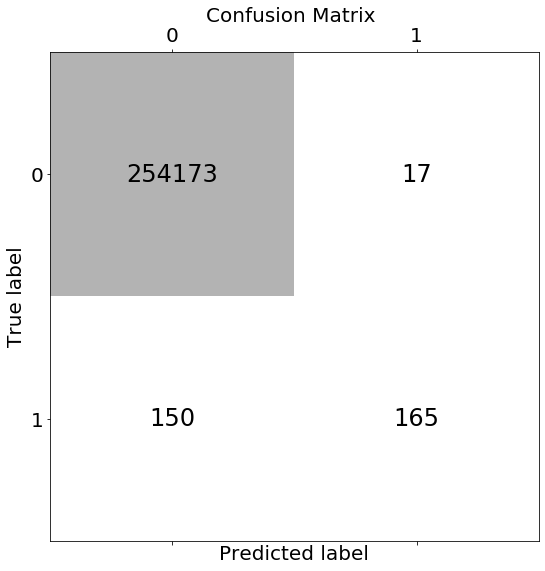

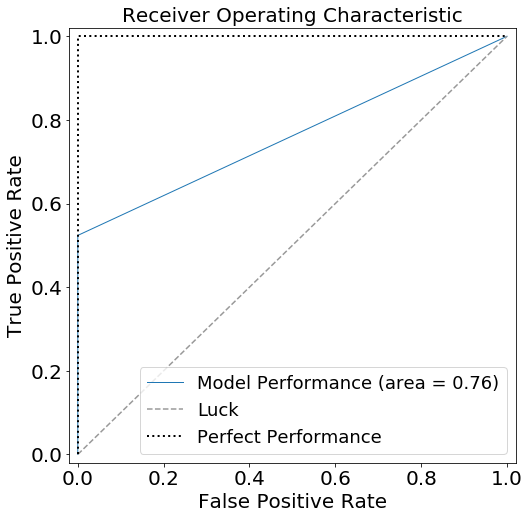

In [11]:
ordinary(X_train, X_test, y_train, y_test, model)


F1:  0.706959706959707
Cohen Kappa:  0.7066602490492002
Brier:  0.0006286713424097758
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254172
           1       0.91      0.58      0.71       333

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.95      0.79      0.85    254505
weighted avg       1.00      1.00      1.00    254505



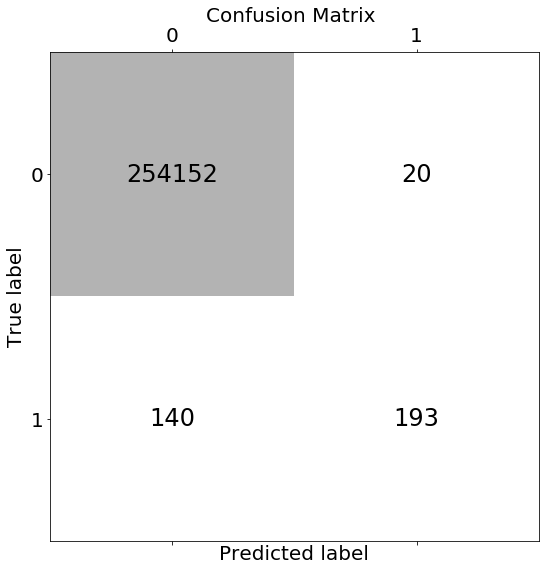

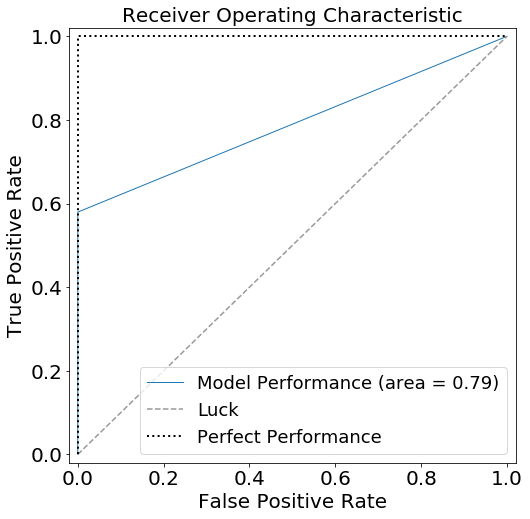

In [37]:
class_weight(X_train, X_test, y_train, y_test, model)
#Not Applicable 

Before resampling: [(0, 1016715), (1, 1304)]
After resampling: [(0, 1016715), (1, 1016715)]
F1:  0.5857519788918205
Cohen Kappa:  0.5851462743744292
Brier:  0.0012337675094791852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254179
           1       0.51      0.68      0.59       326

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.76      0.84      0.79    254505
weighted avg       1.00      1.00      1.00    254505



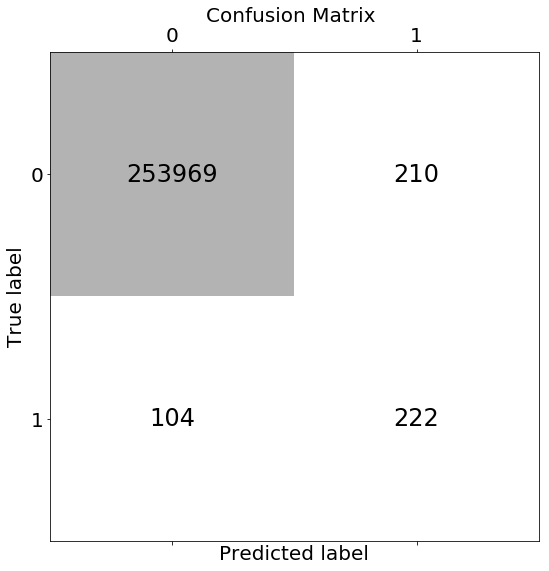

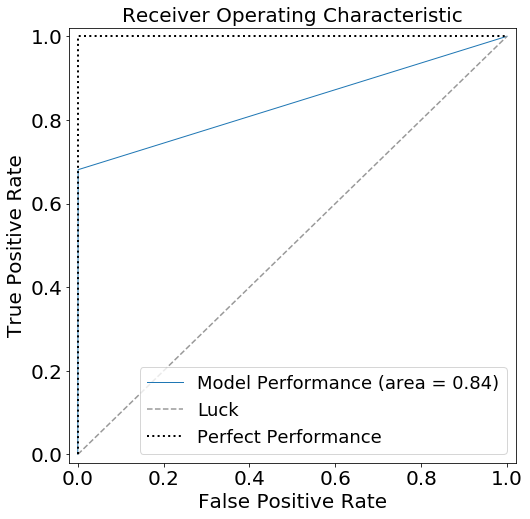

In [11]:
Oversampling(X_train, X_test, y_train, y_test, model, RandomOverSampler()) 
#RandomOverSampler

Before resampling: [(0, 1016761), (1, 1258)]
After resampling: [(0, 1016761), (1, 1016761)]
F1:  0.18100224382946897
Cohen Kappa:  0.17920981085329413
Brier:  0.008604938999233806
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    254190
           1       0.10      0.77      0.18       315

    accuracy                           0.99    254505
   macro avg       0.55      0.88      0.59    254505
weighted avg       1.00      0.99      0.99    254505



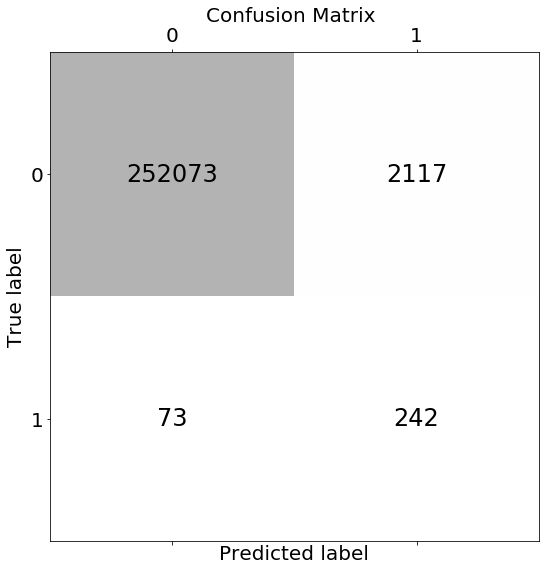

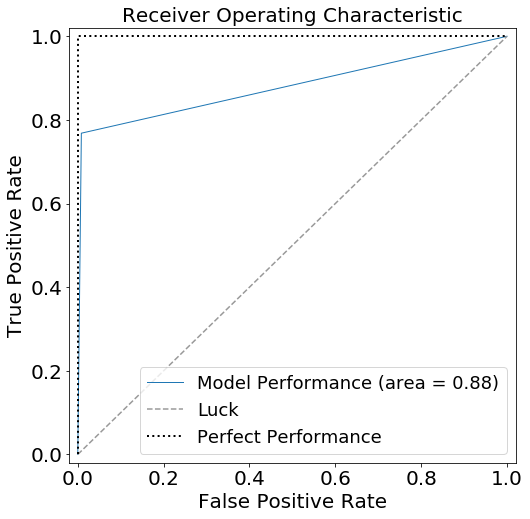

In [12]:
Oversampling(X_train, X_test, y_train, y_test, model,SMOTE())
#SMOTE()

Before resampling: [(0, 1016761), (1, 1258)]
After resampling: [(0, 1016761), (1, 1016820)]
F1:  0.17621464829586655
Cohen Kappa:  0.17440438889600407
Brier:  0.008927133062218817
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    254190
           1       0.10      0.77      0.18       315

    accuracy                           0.99    254505
   macro avg       0.55      0.88      0.59    254505
weighted avg       1.00      0.99      0.99    254505



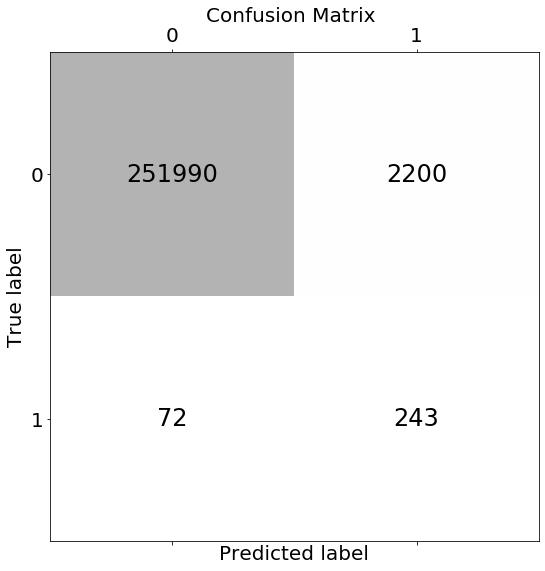

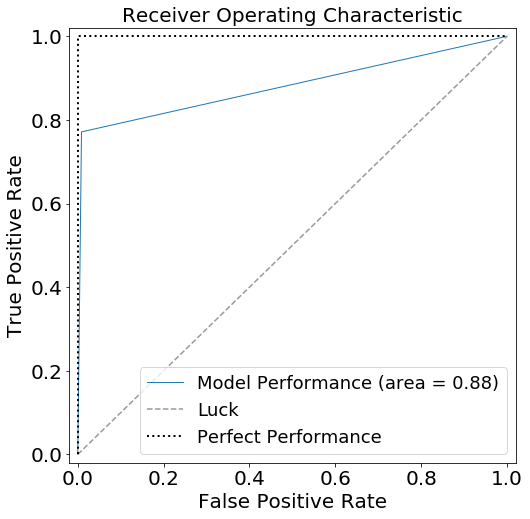

In [13]:
Oversampling(X_train, X_test, y_train, y_test, model,ADASYN())
#ADASYN()

Technique: RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
Before resampling: [(0, 1016761), (1, 1258)]
After resampling: [(0, 1258), (1, 1258)]
[0.         0.08972422 1.        ] [0.         0.85396825 1.        ]
F1:  0.023000299260399298
Cohen Kappa:  0.020608568594095544
Brier:  0.0897939136755663
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    254190
           1       0.01      0.85      0.02       315

    accuracy                           0.91    254505
   macro avg       0.51      0.88      0.49    254505
weighted avg       1.00      0.91      0.95    254505



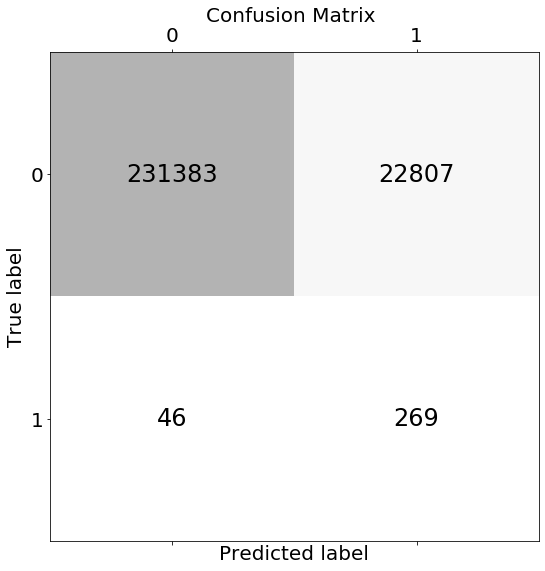

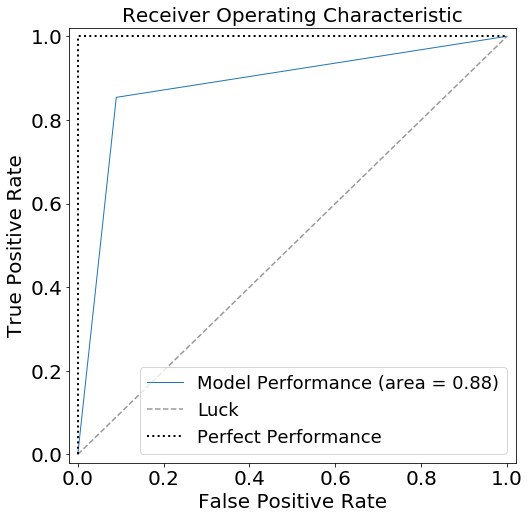

In [14]:
Undersampling(X_train, X_test, y_train, y_test, model,RandomUnderSampler())
#RandomUnderSampler()

Technique: TomekLinks(n_jobs=1, random_state=None, ratio=None, return_indices=False,
           sampling_strategy='auto')
Before resampling: [(0, 1016761), (1, 1258)]
After resampling: [(0, 1016532), (1, 1258)]
[0.00000000e+00 7.08131712e-05 1.00000000e+00] [0.         0.52380952 1.        ]
F1:  0.6626506024096386
Cohen Kappa:  0.6623434590399295
Brier:  0.0006601049095302646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254190
           1       0.90      0.52      0.66       315

    accuracy                           1.00    254505
   macro avg       0.95      0.76      0.83    254505
weighted avg       1.00      1.00      1.00    254505



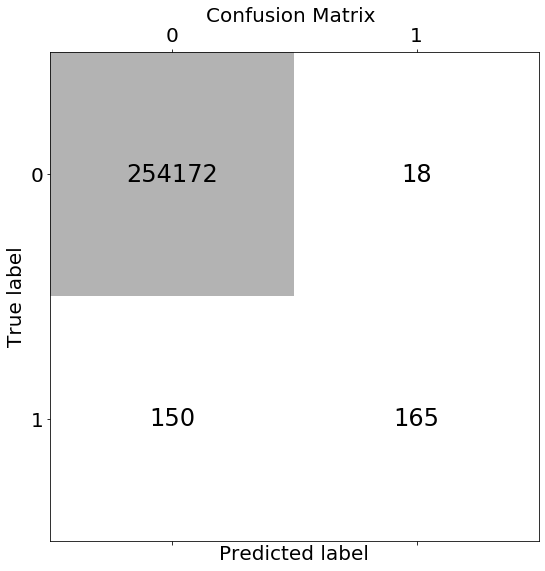

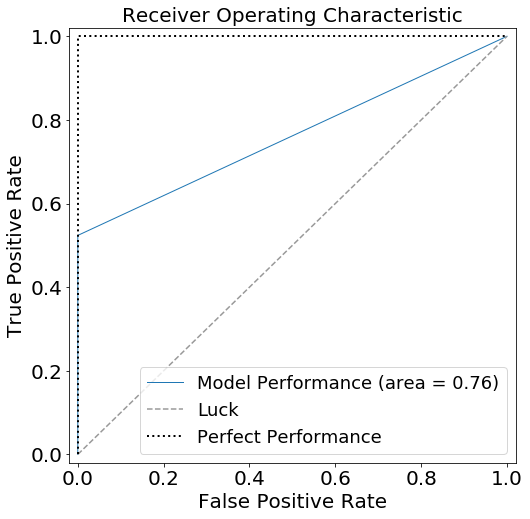

In [15]:
Undersampling(X_train, X_test, y_train, y_test, model,TomekLinks())
#TomekLinks()

Technique: EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                        random_state=None, ratio=None, return_indices=False,
                        sampling_strategy='auto')
Before resampling: [(0, 1016761), (1, 1258)]
After resampling: [(0, 1015643), (1, 1258)]
[0.00000000e+00 1.14087887e-04 1.00000000e+00] [0.         0.53333333 1.        ]
F1:  0.65625
Cohen Kappa:  0.6559222844553931
Brier:  0.0006915384766507534
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254190
           1       0.85      0.53      0.66       315

    accuracy                           1.00    254505
   macro avg       0.93      0.77      0.83    254505
weighted avg       1.00      1.00      1.00    254505



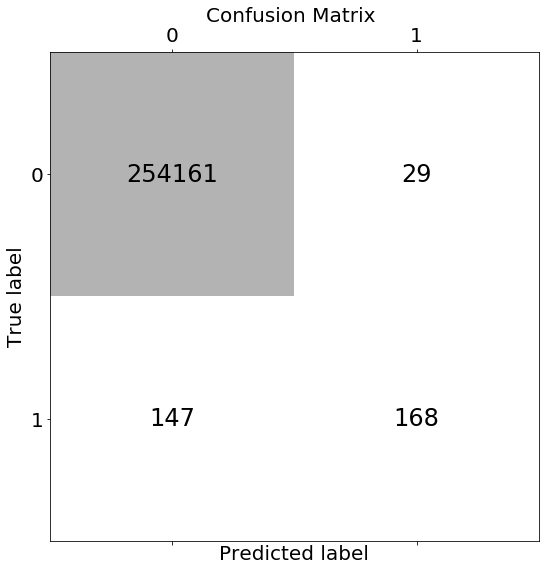

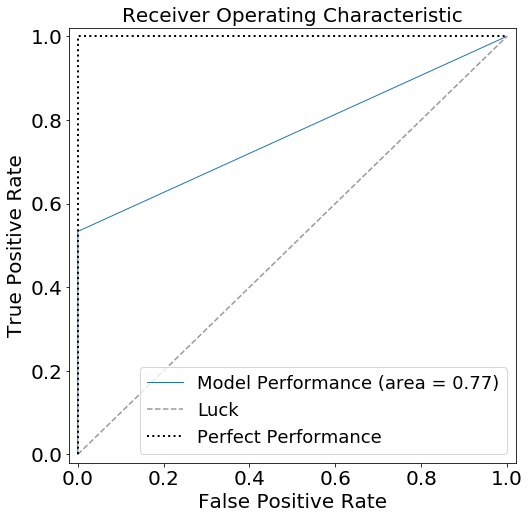

In [16]:
Undersampling(X_train, X_test, y_train, y_test, model,EditedNearestNeighbours())
#EditedNearestNeighbours()

In [ ]:
#Nearmiss
#Undersampling(X_train, X_test, y_train, y_test, model,Nearmiss())

In [ ]:
#Undersampling(X_train, X_test, y_train, y_test, model,NearMiss(version=2))
#NearMiss(version=2)